In [20]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [21]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [22]:
labels = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses','ships', 'trucks']

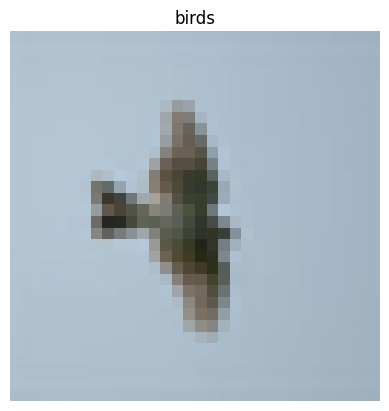

In [23]:
import matplotlib.pyplot as plt
import numpy as np
i = np.random.randint(0, 50001)
plt.imshow(x_train[i])  # Display the image
plt.title(labels[y_train[i][0]])  # Display the corresponding label
plt.axis('off')  # Optional: turn off axis
plt.show()


In [24]:
import pandas as pd
pd.Series(y_train.flatten()).value_counts()

,count
6,5000
9,5000
4,5000
1,5000
2,5000
7,5000
8,5000
3,5000
5,5000
0,5000


In [25]:
x_train = x_train/255
x_test = x_test/255


In [26]:
#ANN model
ann = tf.keras.Sequential()
ann.add(tf.keras.layers.Flatten(input_shape = x_train[0].shape))
ann.add(tf.keras.layers.Dense(2048, activation = 'relu'))
ann.add(tf.keras.layers.Dense(1024, activation = 'relu'))
ann.add(tf.keras.layers.Dense(10, activation = 'softmax'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
ann.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2048)                │       6,293,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,401,930 (32.05 MB)

 Trainable params: 8,401,930 (32.05 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
ann.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy,
            metrics = ['accuracy'])

In [37]:
history = ann.fit(x_train, y_train,epochs=10, validation_split=0.1)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5066 - loss: 1.3801 - val_accuracy: 0.4810 - val_loss: 1.4847
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5126 - loss: 1.3642 - val_accuracy: 0.4494 - val_loss: 1.5616
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5168 - loss: 1.3511 - val_accuracy: 0.4852 - val_loss: 1.4780
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5271 - loss: 1.3216 - val_accuracy: 0.4778 - val_loss: 1.4922
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5301 - loss: 1.3084 - val_accuracy: 0.4696 - val_loss: 1.5214
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5291 - loss: 1.3051 - val_accuracy: 0.4742 - val_loss: 1.5007
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5403 - loss: 1.2841 - val_accuracy: 0.4726 - val_loss: 1.5293
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5500 - loss: 1.2639 - 

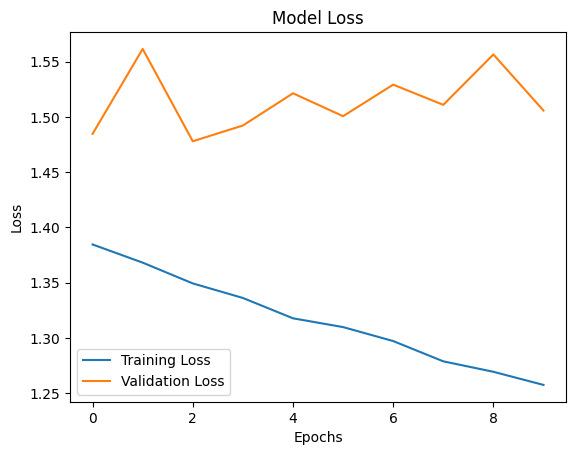

In [38]:


# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
#CNN model
cnn = tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(32,(3,3),input_shape = x_train[0].shape))
cnn.add(tf.keras.layers.MaxPool2D())
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(30, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(13, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [49]:
cnn.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 30)                  │         216,030 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 13)                  │             403 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             140 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217,469 (849.49 KB)

 Trainable params: 217,469 (849.49 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
cnn.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy,
            metrics = ['accuracy'])

In [51]:
history = cnn.fit(x_train, y_train,epochs=20, validation_split=0.1)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2956 - loss: 1.9025 - val_accuracy: 0.4594 - val_loss: 1.5256
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5000 - loss: 1.4030 - val_accuracy: 0.5340 - val_loss: 1.3186
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5649 - loss: 1.2315 - val_accuracy: 0.5800 - val_loss: 1.2273
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6059 - loss: 1.1272 - val_accuracy: 0.5746 - val_loss: 1.2437
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6323 - loss: 1.0440 - val_accuracy: 0.5926 - val_loss: 1.1791
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6557 - loss: 0.9840 - val_accuracy: 0.6014 - val_loss: 1.1741
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6724 - loss: 0.9293 - val_accuracy: 0.6148 - val_loss: 1.1577
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6871 - loss: 0.8747 - 

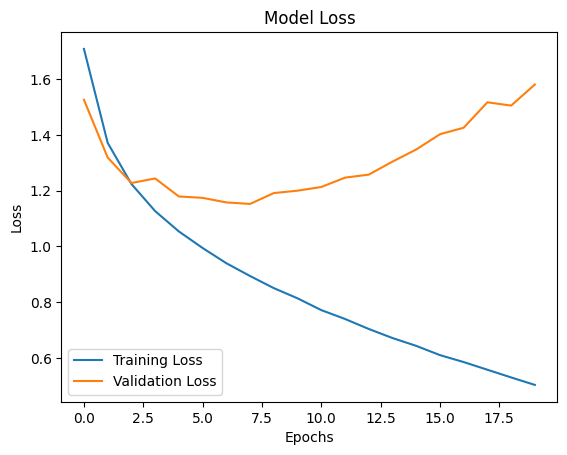

In [52]:
# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()